# EDA
* 각 데이터 시트별로 살펴보겠습니다.

## 모듈 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 800)

## 데이터 로드

In [4]:
path = './data/'

In [14]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
history = pd.read_csv(path + 'historical_transactions.csv')
new_history = pd.read_csv(path + 'new_merchant_transactions.csv')
# merchant = pd.read_csv(path + 'merchants.csv')

In [15]:
train = pd.read_csv(path + 'train.csv')

In [16]:
train = train.sort_values('target')

In [17]:
train.tail(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
127775,2017-09,C_ID_ac31c6e995,1,1,0,13.602322
179615,2017-08,C_ID_f804f44163,3,2,1,13.609871
5252,2017-08,C_ID_1b28c8af6b,3,2,1,14.855160
101409,2017-01,C_ID_756c5e3732,1,1,0,15.011358
81505,2017-01,C_ID_a87b483e03,3,2,1,15.171020
82971,2016-11,C_ID_ecc4e2e188,5,2,1,15.294621
4459,2017-05,C_ID_700c15a07d,3,2,1,15.606405
162468,2017-02,C_ID_b0f1d28bd3,5,1,1,15.994455
4460,2017-01,C_ID_1c8a5b9d44,5,1,1,17.675716
41325,2017-05,C_ID_a4e600deef,5,1,1,17.965068


# 1

In [18]:
temp = history.card_id.value_counts().to_frame().reset_index()
temp.columns = ['card_id', 'card_cnt']

In [19]:
temp_new = new_history.card_id.value_counts().to_frame().reset_index()
temp_new.columns = ['card_id', 'card_cnt_new']

In [20]:
train = train.merge(temp, on='card_id', how='left').merge(temp_new, on='card_id', how='left')
test = test.merge(temp, on='card_id', how='left').merge(temp_new, on='card_id', how='left')

# 2

In [21]:
temp_Y = history[history.authorized_flag == 'Y'].card_id.value_counts().to_frame().reset_index()
temp_Y.columns = ['card_id', 'card_cnt_Y']

In [22]:
temp_N = history[history.authorized_flag == 'N'].card_id.value_counts().to_frame().reset_index()
temp_N.columns = ['card_id', 'card_cnt_N']

In [23]:
temp_new_Y = new_history[new_history.authorized_flag == 'Y'].card_id.value_counts().to_frame().reset_index()
temp_new_Y.columns = ['card_id', 'card_cnt_new_Y']

In [24]:
temp_new_N = new_history[new_history.authorized_flag == 'N'].card_id.value_counts().to_frame().reset_index()
temp_new_N.columns = ['card_id', 'card_cnt_new_N']

In [25]:
train = train.merge(temp_Y, on='card_id', how='left').merge(temp_N, on='card_id', how='left').merge(temp_new_Y, on='card_id', how='left').merge(temp_new_N, on='card_id', how='left')
test = test.merge(temp_Y, on='card_id', how='left').merge(temp_N, on='card_id', how='left').merge(temp_new_Y, on='card_id', how='left').merge(temp_new_N, on='card_id', how='left')

In [26]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [27]:
train = train.sort_values('target')[['card_id', 'card_cnt', 'card_cnt_Y', 'card_cnt_N', 'card_cnt_new', 'card_cnt_new_Y', 'card_cnt_new_N', 'target']]
test = test[['card_id', 'card_cnt', 'card_cnt_Y', 'card_cnt_N', 'card_cnt_new', 'card_cnt_new_Y', 'card_cnt_new_N']]

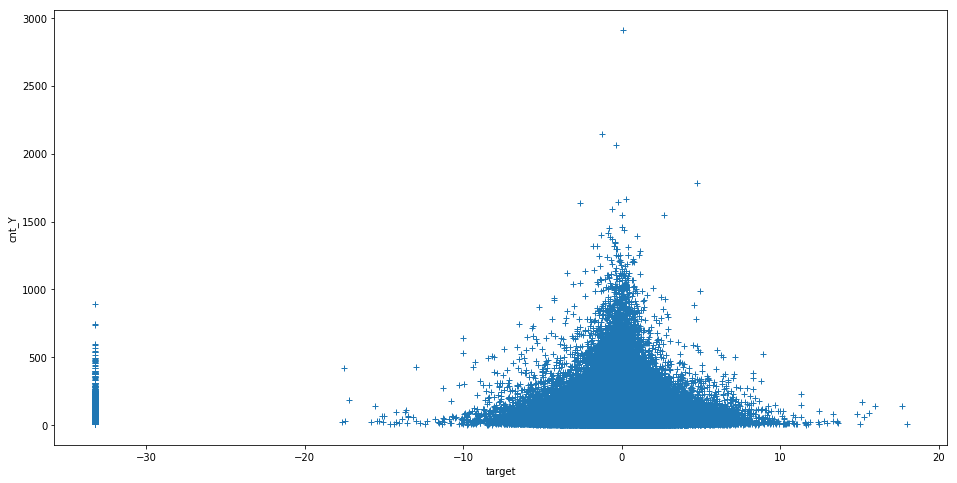

In [28]:
plt.subplots(figsize=(16,8))
plt.plot(train.target.values, train.card_cnt.values, '+')
plt.xlabel('target')
plt.ylabel('cnt_Y')
plt.show();

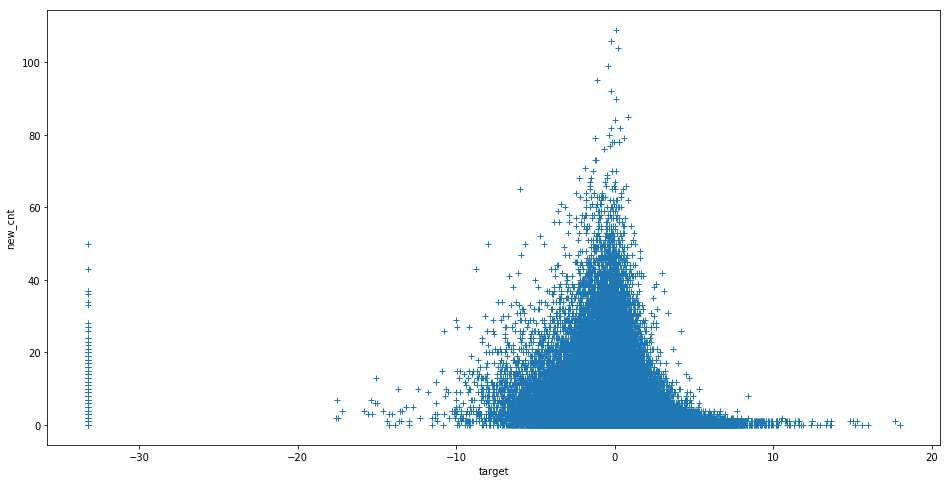

In [31]:
plt.subplots(figsize=(16,8))
plt.plot(train.target.values, train.card_cnt_new_Y.values, '+')
# plt.ylim
plt.xlabel('target')
plt.ylabel('new_cnt')
plt.show();

In [35]:
train[train.card_cnt_new <= 10].shape

(167043, 8)

In [151]:
train[train.card_cnt_new <5].shape

(109092, 8)

In [155]:
train[np.abs(train.target) < 1].shape

(115158, 8)

In [161]:
np.mean(train.target.values ** 2) ** 0.5

3.870558916131629

In [167]:
np.mean(train[np.abs(train.target) <= 1].target.values ** 2) ** 0.5

0.5216419364758058